# Khám phá dữ liệu với Pandas: Telecom Churn

Notebook này bám sát nội dung chính trong bài giảng **“Exploratory data analysis with Pandas”** của mlcourse.ai. Sinh viên Công nghệ thông tin / Khoa học máy tính có thể vừa đọc, vừa chạy mã, đồng thời hoàn thành các bài tập nhỏ để nắm vững kiến thức.

## 0. Chuẩn bị
- Yêu cầu: Python ⩾ 3.8, `pandas`, `numpy`, `matplotlib`, `seaborn`.
- Dữ liệu: `telecom_churn.csv` được tải trực tiếp từ kho dữ liệu của khóa học.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)
#sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("notebook", font_scale=1.1)

## 1. Nạp dữ liệu và nhìn tổng quan

In [5]:
#DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv"
DATA_URL = "./input/telecom_churn.csv"
df = pd.read_csv(DATA_URL)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 1.1 Thông tin kích thước, kiểu dữ liệu

In [6]:
print("Kích thước:", df.shape)
print("\nTên cột:\n", list(df.columns))
print("\nThông tin chung:")
df.info()

Kích thước: (3333, 20)

Tên cột:
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Thông tin chung:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes    

### 1.2 Thống kê mô tả nhanh

In [7]:
df["Churn"] = df["Churn"].astype("int64")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


#### Bài tập 1
Sử dụng `describe(include=["object", "bool"])` để xem thống kê cho các cột phân loại. Viết nhận xét ngắn về phân bố của `International plan` và `Voice mail plan`.

In [9]:
# Gợi ý:
df.describe(include=["object", "bool"])
# TODO: Hiển thị kết quả và ghi chú nhận xét của bạn ở cell Markdown kế tiếp.



,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


## 2. Sắp xếp (Sorting) và lập chỉ mục (Indexing)
Ví dụ: sắp xếp theo `Total day charge` giảm dần rồi xem 5 dòng đầu.

In [11]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


#### Bài tập 2
1. Sắp xếp tăng dần theo `Churn`, đồng thời giảm dần theo `Total night minutes`.
2. Lấy các cột từ `State` đến `Area code` cho 7 dòng đầu bằng `loc`.
3. Lấy các dòng 10–14 và cột chỉ số 3–6 bằng `iloc`.

In [ ]:
# TODO: Hoàn thành các yêu cầu trong Bài tập 2.
# Gợi ý sử dụng df.sort_values, df.loc, df.iloc

## 3. Lọc dữ liệu & thống kê có điều kiện
- Tỷ lệ khách hàng rời bỏ (`Churn = 1`).
- Trung bình `Total day minutes` cho nhóm churn.

In [12]:
churn_rate = df["Churn"].mean()
avg_day_minutes_churn = df.loc[df["Churn"] == 1, "Total day minutes"].mean()
print(f"Tỷ lệ churn: {churn_rate:.2%}")
print(f"TB phút gọi ban ngày (churn): {avg_day_minutes_churn:.2f}")

Tỷ lệ churn: 14.49%
TB phút gọi ban ngày (churn): 206.91


#### Bài tập 3
Tính: 
- Trung bình `Customer service calls` của nhóm không churn.
- Giá trị `Total intl minutes` lớn nhất trong nhóm khách hàng không có International plan và không churn.

In [ ]:
# TODO: Viết code tính 2 giá trị theo yêu cầu Bài tập 3.

## 4. `apply`, `map`, `replace`
Ví dụ: chuyển `International plan` từ "Yes/No" sang True/False bằng `map`.

In [13]:
plan_map = {"Yes": True, "No": False}
df["International plan"] = df["International plan"].map(plan_map)
df["Voice mail plan"] = df["Voice mail plan"].map(plan_map)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Bài tập 4
1. Dùng `apply` để tạo cột `State_initial` chứa ký tự đầu của `State`.
2. Dùng `replace` (hoặc `map`) thay `Churn` từ 0/1 thành "Loyal"/"Churned" trong một bản sao DataFrame.

In [ ]:
# TODO: Thực hiện yêu cầu Bài tập 4.

## 5. Nhóm (groupby), bảng chéo và pivot
Ví dụ: thống kê mô tả `Total day/eve/night minutes` theo `Churn`.

In [14]:
cols = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby("Churn")[cols].agg(["mean", "std", "min", "max"])

Total day minutes                    Total eve minutes               \
                   mean    std  min    max              mean    std   min   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
         max                mean    std   min    max  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### 5.1 Bảng chéo & biểu đồ
- `crosstab` giữa `Churn` và `International plan`.
- Biểu đồ đếm với `seaborn`.

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


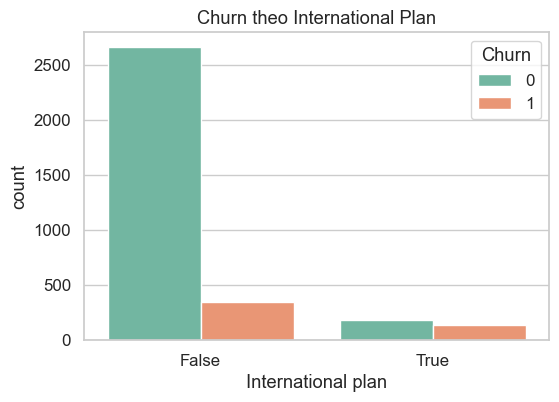

In [15]:
ct_plan = pd.crosstab(df["Churn"], df["International plan"], margins=True)
display(ct_plan)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="International plan", hue="Churn")
plt.title("Churn theo International Plan")
plt.show()

#### Bài tập 5
1. Tạo `crosstab` giữa `Churn` và `Voice mail plan` với `normalize='index'`.
2. Dựng `pivot_table` tính trung bình `Total day calls`, `Total eve calls`, `Total night calls` theo `Area code` (gợi ý như bài gốc).
3. Viết nhận xét ngắn về sự khác biệt giữa các mã vùng.

In [ ]:
# TODO: Hoàn thành Bài tập 5.

## 6. Biến đổi DataFrame & tạo đặc trưng
Ví dụ: tạo các cột `Total calls`, `Total charge`, sau đó loại bỏ để minh họa `insert` và `drop`.

In [16]:
df["Total calls"] = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df[["Total calls", "Total charge"]].head()

,Total calls,Total charge
0,303,75.56
1,332,59.24
2,333,62.29
3,255,66.80
4,359,52.09


#### Bài tập 6
1. Tạo biến nhị phân `Many_service_calls` = 1 nếu `Customer service calls > 3`, ngược lại 0.
2. Tạo cột `High_day_minutes` = 1 nếu `Total day minutes` lớn hơn phân vị 75%.
3. Dùng `crosstab` để xem mối quan hệ giữa hai biến mới với `Churn`.

In [ ]:
# TODO: Hoàn thành Bài tập 6.

## 7. Baseline rule-based model
Theo bài giảng, ta có thể đặt luật:
- Nếu `International plan == True` **và** `Customer service calls > 3` ⇒ dự đoán `Churn = 1`.
- Ngược lại dự đoán `Churn = 0`.

Ta sẽ kiểm tra độ chính xác (accuracy) của luật này để làm baseline.

In [17]:
rule_pred = (
    (df["International plan"] == True)
    & (df["Customer service calls"] > 3)
).astype(int)
baseline_acc = (rule_pred == df["Churn"]).mean()
print(f"Độ chính xác baseline: {baseline_acc:.2%}")

pd.crosstab(rule_pred, df["Churn"], margins=True, rownames=["Rule prediction"], colnames=["Actual Churn"])

Độ chính xác baseline: 85.81%


Actual Churn,0,1,All
Rule prediction,,,
0,2841,464,3305
1,9,19,28
All,2850,483,3333


#### Bài tập 7
1. Đề xuất **một luật mới** (ví dụ kết hợp `Total charge` và `Many_service_calls`).
2. Tính độ chính xác của luật đó.
3. So sánh với baseline và ghi nhận xét.

In [ ]:
# TODO: Viết luật mới và đánh giá theo hướng dẫn Bài tập 7.

## 8. Kết luận & Tài nguyên tham khảo
- Tỷ lệ khách hàng trung thành ~85.5%, do đó bất kỳ mô hình nào cũng phải vượt mức này.
- Luật đơn giản dựa trên `International plan` và `Customer service calls` đạt ~85.8%.
- Quy trình EDA gồm: xem cấu trúc, thống kê mô tả, lọc điều kiện, groupby, bảng chéo, pivot và tạo đặc trưng.

**Tài nguyên:**
- Bài giảng gốc: [mlcourse.ai – Exploratory data analysis with Pandas](https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html)
- Pandas documentation: https://pandas.pydata.org/docs/
- “10 Minutes to pandas” & Pandas cheatsheet.